# Import the Requirements

In [12]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the cat and dog dataset

In [18]:
cat_dir = "/Users/hadiyahfarhat/Downloads/animals/cat"
dog_dir = "/Users/hadiyahfarhat/Downloads/animals/dog"
# Image size
IMG_SIZE = 128

# Load the images and labels

In [19]:
# Load images and labels into memory
def load_images(folder, label):
    images = []
    labels = []
    count = 1
    # x = os.listdir(folder)
    for filename in os.listdir(folder):
        
        if filename.lower().endswith(('jpg', 'jpeg', 'png')):
            try:
                path = os.path.join(folder, filename)
                img = Image.open(path).convert("RGB")
                img = img.resize((IMG_SIZE, IMG_SIZE))
                img = np.array(img) / 255.0  # Normalize
                images.append(img)
                labels.append(label)
                count+=1
                if count == 10:
                    break
            except:
                continue  # Skip corrupted files
    return images, labels


In [20]:
cat_images, cat_labels = load_images(cat_dir, 0)
dog_images, dog_labels = load_images(dog_dir, 1)

# Combine the images and labels and create the train test splits

In [21]:

# Combine and split
X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

# One-hot encode labels
y = tf.keras.utils.to_categorical(y, num_classes=2)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use sequential model for training and prediction

In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D(4,4),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])



/Users/hadiyahfarhat/Downloads/cat-dog/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,402 (3.14 MB)

 Trainable params: 822,402 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [30]:

history = model.fit(X_train, y_train, validation_split=0.2, steps_per_epoch=2, epochs=2, batch_size=8)
history.history

Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5455 - loss: 0.5675 - val_accuracy: 0.6667 - val_loss: 0.6232
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.5117 - val_accuracy: 0.6667 - val_loss: 0.6192


{'accuracy': [0.5454545617103577, 0.9090909361839294],
 'loss': [0.5674984455108643, 0.5117402672767639],
 'val_accuracy': [0.6666666865348816, 0.6666666865348816],
 'val_loss': [0.6231971383094788, 0.6191624999046326]}

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 0.6834
Test Loss: 0.6834, Test Accuracy: 0.5000


# Visualize the metrics

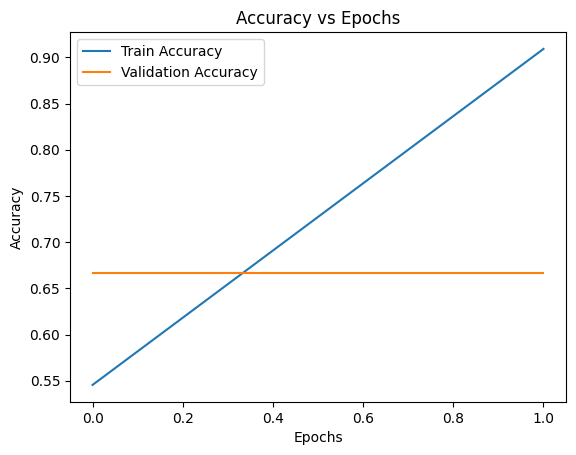

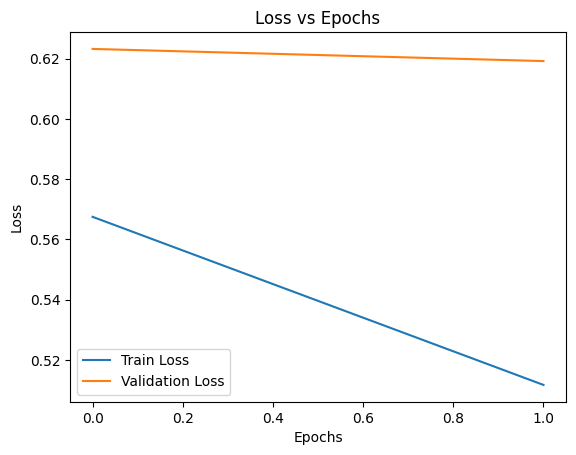

In [31]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Epochs")
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Epochs")
plt.show()